In [23]:
import os
import cv2
import time
from openvino.inference_engine import IECore
%matplotlib inline
from matplotlib import pyplot as plt
print('Imported Python modules successfully.')

Imported Python modules successfully.


In [3]:
!pip install openvino-dev
!pip install openvino

  Using cached scikit_image-0.17.2-cp36-cp36m-win_amd64.whl (11.5 MB)
  Using cached tifffile-2020.9.3-py3-none-any.whl (148 kB)
  Created wheel for jstyleson: filename=jstyleson-0.0.2-py3-none-any.whl size=2401 sha256=eece1f81fc44be47b9d4b68cb63aa2375c5eb2267e8eed31799c89db60a52031
  Stored in directory: c:\users\abdoul\appdata\local\pip\cache\wheels\b4\81\d5\cdb314e9ce581447d273295dae3047b4ce87573996df43c0cd
  Created wheel for progress: filename=progress-1.6-py3-none-any.whl size=9630 sha256=32aefb815503b11a34223951664324ee233c665b577e50818f05d8beabc120b1
  Stored in directory: c:\users\abdoul\appdata\local\pip\cache\wheels\9f\92\2c\aa26d18b6a4d7df29d2cf1e1ff0bcf124a58fc10118485b160
Successfully built jstyleson progress
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.16.1
    Uninstalling scikit-image-0.16.1:
      Successfully uninstalled scikit-image-0.16.1


In [6]:
# Check all the available inference models

!omz_downloader --print_all

Sphereface
aclnet
aclnet-int8
action-recognition-0001
age-gender-recognition-retail-0013
alexnet
anti-spoof-mn3
asl-recognition-0004
background-matting-mobilenetv2
bert-base-ner
bert-large-uncased-whole-word-masking-squad-0001
bert-large-uncased-whole-word-masking-squad-emb-0001
bert-large-uncased-whole-word-masking-squad-int8-0001
bert-small-uncased-whole-word-masking-squad-0001
bert-small-uncased-whole-word-masking-squad-0002
bert-small-uncased-whole-word-masking-squad-emb-int8-0001
bert-small-uncased-whole-word-masking-squad-int8-0002
brain-tumor-segmentation-0001
brain-tumor-segmentation-0002
caffenet
cocosnet
colorization-siggraph
colorization-v2
common-sign-language-0001
common-sign-language-0002
ctdet_coco_dlav0_512
ctpn
deblurgan-v2
deeplabv3
densenet-121
densenet-121-tf
detr-resnet50
dla-34
driver-action-recognition-adas-0002
drn-d-38
efficientdet-d0-tf
efficientdet-d1-tf
efficientnet-b0
efficientnet-b0-pytorch
efficientnet-v2-b0
efficientnet-v2-s
emotions-recognition-retail-0

In [8]:
# Download the mobilenet-ssd model for our object detection project

!omz_downloader --name mobilenet-ssd -o raw_model

################|| Downloading mobilenet-ssd ||################

========== Downloading raw_model\public\mobilenet-ssd\mobilenet-ssd.prototxt
... 100%, 28 KB, ? KB/s, 0 seconds passed

========== Downloading raw_model\public\mobilenet-ssd\mobilenet-ssd.caffemodel
... 4%, 1024 KB, 712 KB/s, 1 seconds passed
... 9%, 2048 KB, 1032 KB/s, 1 seconds passed
... 13%, 3072 KB, 1252 KB/s, 2 seconds passed
... 18%, 4096 KB, 1409 KB/s, 2 seconds passed
... 22%, 5120 KB, 1606 KB/s, 3 seconds passed
... 27%, 6144 KB, 1732 KB/s, 3 seconds passed
... 31%, 7168 KB, 1879 KB/s, 3 seconds passed
... 36%, 8192 KB, 2000 KB/s, 4 seconds passed
... 40%, 9216 KB, 2084 KB/s, 4 seconds passed
... 45%, 10240 KB, 2228 KB/s, 4 seconds passed
... 49%, 11264 KB, 2333 KB/s, 4 seconds passed
... 54%, 12288 KB, 2383 KB/s, 5 seconds passed
... 58%, 13312 KB, 2447 KB/s, 5 seconds passed
... 63%, 14336 KB, 2466 KB/s, 5 seconds passed
... 67%, 15360 KB, 2357 KB/s, 6 seconds passed
... 72%, 16384 KB, 2309 KB/s, 7 seconds pas

Now, use mo to convert the models that are not in the Inference Engine IR format into that format using Model Optimizer.

In [9]:
!mo \
--input_model ./raw_model/public/mobilenet-ssd/mobilenet-ssd.caffemodel \
--data_type FP16 \
--output_dir ./model/public/mobilenet-ssd/FP16 \
--scale 256 \
--mean_values [127,127,127] 

# Create FP32 IR files
!mo \
--input_model ./raw_model/public/mobilenet-ssd/mobilenet-ssd.caffemodel \
--data_type FP32 \
--output_dir ./model/public/mobilenet-ssd/FP32 \
--scale 256 \
--mean_values [127,127,127] 

Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	D:\github\Intel_AI_certification\./raw_model/public/mobilenet-ssd/mobilenet-ssd.caffemodel
	- Path for generated IR: 	D:\github\Intel_AI_certification\./model/public/mobilenet-ssd/FP16
	- IR output name: 	mobilenet-ssd
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	Not specified, inherited from the model
	- Output layers: 	Not specified, inherited from the model
	- Input shapes: 	Not specified, inherited from the model
	- Source layout: 	Not specified
	- Target layout: 	Not specified
	- Layout: 	Not specified
	- Mean values: 	[127,127,127]
	- Scale values: 	Not specified
	- Scale factor: 	256.0
	- Precision of IR: 	FP16
	- Enable fusing: 	True
	- User transformations: 	Not specified
	- Reverse input channels: 	False
	- Enable IR generation for fixed input shape: 	False
	- Use the transformations config file: 	None
Advanced parameters:
	- Force the usage of legacy Fronte

[ WARNING ]  
Detected not satisfied dependencies:
	networkx: installed: 2.5.1, required: ~= 2.6
	fastjsonschema: not installed, required: ~= 2.15.1

Please install required versions of components or run pip installation
pip install openvino-dev[caffe]
D:\Program_File\anaconda3\envs\kerasenv\lib\site-packages\numpy\lib\function_base.py:792: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, order=order, subok=subok, copy=True)


Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	D:\github\Intel_AI_certification\./raw_model/public/mobilenet-ssd/mobilenet-ssd.caffemodel
	- Path for generated IR: 	D:\github\Intel_AI_certification\./model/public/mobilenet-ssd/FP32
	- IR output name: 	mobilenet-ssd
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	Not specified, inherited from the model
	- Output layers: 	Not specified, inherited from the model
	- Input shapes: 	Not specified, inherited from the model
	- Source layout: 	Not specified
	- Target layout: 	Not specified
	- Layout: 	Not specified
	- Mean values: 	[127,127,127]
	- Scale values: 	Not specified
	- Scale factor: 	256.0
	- Precision of IR: 	FP32
	- Enable fusing: 	True
	- User transformations: 	Not specified
	- Reverse input channels: 	False
	- Enable IR generation for fixed input shape: 	False
	- Use the transformations config file: 	None
Advanced parameters:
	- Force the usage of legacy Fronte

[ WARNING ]  
Detected not satisfied dependencies:
	networkx: installed: 2.5.1, required: ~= 2.6
	fastjsonschema: not installed, required: ~= 2.15.1

Please install required versions of components or run pip installation
pip install openvino-dev[caffe]
D:\Program_File\anaconda3\envs\kerasenv\lib\site-packages\numpy\lib\function_base.py:792: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, order=order, subok=subok, copy=True)


In [11]:
!pip install networkx fastjsonschema==2.15.1

### Configuration
Here we will create and set the following configuration parameters used by the sample:  
* **model_xml** - Path to the .xml IR file of the trained model to use for inference
* **model_bin** - Path to the .bin IR file of the trained model to use for inference (derived from *model_xml*)
* **input_path** - Path to input image
* **device** - Specify the target device to infer on,  CPU, GPU, FPGA, or MYRIAD is acceptable, however the device must be present.  Here we use "CPU".
* **labels_path** - Path to labels mapping file used to map outputted integers to strings (e.g. 7="car")
* **prob_threshold** - Probability threshold for filtering detection results

We will set all parameters here only once except for `input_path` which we will change later to point to different images and video.

In [24]:
# model IR files
model_xml = "model/public/mobilenet-ssd/FP32/mobilenet-ssd.xml"
model_bin = os.path.splitext(model_xml)[0] + ".bin" # create IR .bin filename from path to IR .xml file

# input image file
input_path = "car.bmp"

# CPU extension library to use
cpu_extension_path = os.path.expanduser("~")+"/inference_engine_samples/intel64/Release/lib/libcpu_extension.so"

# device to use
device = "CPU"

# output labels 
labels_path = "labels.txt"

# minimum probability threshold to detect an object
prob_threshold = 0.6

print("Configuration parameters settings:"
     "\n\tmodel_xml=", model_xml,
      "\n\tmodel_bin=", model_bin,
      "\n\tinput_path=", input_path,
      "\n\tdevice=", device, 
      "\n\tlabels_path=", labels_path, 
      "\n\tprob_threshold=", prob_threshold)

Configuration parameters settings:
	model_xml= model/public/mobilenet-ssd/FP32/mobilenet-ssd.xml 
	model_bin= model/public/mobilenet-ssd/FP32/mobilenet-ssd.bin 
	input_path= car.bmp 
	device= CPU 
	labels_path= labels.txt 
	prob_threshold= 0.6


### We create the Inference Engine instance to be used by our application.

In [25]:
# create Inference Engine instance
ie = IECore()
print("An Inference Engine object has been created")

An Inference Engine object has been created


### Create network

Here we create an IENetwork object and load the model's IR files into it. After loading the model, we check to make sure that all the model's layers are supported by the plugin we will use. We also check to make sure that the model's input and output are as expected for later when we run inference.

In [26]:
# load network from IR files
net = ie.read_network(model=model_xml, weights=model_bin)
print("Loaded model IR files [",model_bin,"] and [", model_xml, "]\n")

# check to make sue that the model's input and output are what is expected
assert len(net.input_info.keys()) == 1, \
    "ERROR: This sample supports only single input topologies"
assert len(net.outputs) == 1, \
    "ERROR: This sample supports only single output topologies"
print("SUCCESS: Model IR files have been loaded and verified")

Loaded model IR files [ model/public/mobilenet-ssd/FP32/mobilenet-ssd.bin ] and [ model/public/mobilenet-ssd/FP32/mobilenet-ssd.xml ]

SUCCESS: Model IR files have been loaded and verified


### Load model

Here we load the model network into the plugin so that we may run inference.  `exec_net` will be used later to actually run inference.  After loading, we store the names of the input (`input_blob`) and output (`output_blob`) blobs to use when accessing the input and output blobs of the model.  Lastly, we store the model's input dimensions into the following variables:
- `n` = input batch size
- `c` = number of input channels (here 1 channel per color R,G, and B)
- `h` = input height
- `w` = input width

In [27]:
# load the model into the Inference Engine for our device
exec_net = ie.load_network(network=net, num_requests=2, device_name=device)

# store name of input and output blobs
input_blob = next(iter(net.input_info))
output_blob = next(iter(net.outputs))

# read the input's dimensions: n=batch size, c=number of channels, h=height, w=width
n, c, h, w = net.input_info[input_blob].input_data.shape
print("Loaded model into Inference Engine for device:", device, 
      "\nModel input dimensions: n=",n,", c=",c,", h=",h,", w=",w)

Loaded model into Inference Engine for device: CPU 
Model input dimensions: n= 1 , c= 3 , h= 300 , w= 300


### Load labels

For each detected object, the output from the model will include an integer to indicate which type (e.g. car, person, etc.) of trained object has been detected.  To translate the integer into a more readable text string, a label mapping file may be used.  The label mapping file is simply a text file of the format "n: string" (e.g. "7: car" for 7="car") that is loaded into a lookup table to be used later while labeling detected objects.

Here, if the `labels_path` variable has been set to point to a label mapping file, we open the file and load the labels into the variable `labels_map`.

In [28]:
labels_map = None
# if labels points to a label mapping file, then load the file into labels_map
print(labels_path)
if os.path.isfile(labels_path):
    with open(labels_path, 'r') as f:
        labels_map = [x.split(sep=' ', maxsplit=1)[-1].strip() for x in f]
    print("Loaded label mapping file [",labels_path,"]")
else:
    print("No label mapping file has been loaded, only numbers will be used",
          " for detected object labels")

labels.txt
Loaded label mapping file [ labels.txt ]


In [22]:
f = open("labels.txt", "r")
print(f.read())

0: background
1: aeroplane
2: bicycle
3: bird
4: boat
5: bottle
6: bus
7: car
8: cat
9: chair
10: cow
11: diningtable
12: dog
13: horse
14: motorbike
15: person
16: pottedplant
17: sheep
18: sofa
19: train
20: tvmonitor


### Prepare input

Here we read and then prepare the input image by resizing and re-arranging its dimensions according to the model's input dimensions. We define the functions `loadInputImage()` and `resizeInputImage()` for the operations so that we may reuse them again later.

Loaded input image [ https://github.com/chuanqi305/MobileNet-SSD/raw/master/images/004545.jpg ], resolution= 500.0 w x  375.0 h
Resized input image from (375, 500) to (300, 300)
Input image:


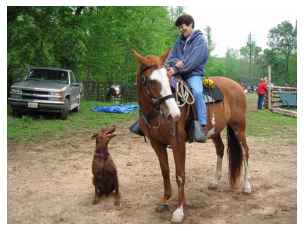

In [29]:
# define function to load an input image
def loadInputImage(input_path, verbose = True):
    # globals to store input width and height
    global input_w, input_h
    
    # use OpenCV to load the input image
    cap = cv2.VideoCapture(input_path) 
    
    # store input width and height
    input_w = cap.get(3)
    input_h = cap.get(4)
    if verbose: print("Loaded input image [",input_path,"], resolution=", input_w, "w x ",input_h,"h")

    # load the input image
    ret, image = cap.read()
    del cap
    return image

# define function for resizing input image
def resizeInputImage(image, verbose = True):
    # resize image dimensions form image to model's input w x h
    in_frame = cv2.resize(image, (w, h))
    # Change data layout from HWC to CHW
    in_frame = in_frame.transpose((2, 0, 1))  
    # reshape to input dimensions
    in_frame = in_frame.reshape((n, c, h, w))
    if verbose: print("Resized input image from {} to {}".format(image.shape[:-1], (h, w)))
    return in_frame

# load image
input_path="https://github.com/chuanqi305/MobileNet-SSD/raw/master/images/004545.jpg"
image = loadInputImage(input_path)

# resize the input image
in_frame = resizeInputImage(image)

# display input image
print("Input image:")
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [30]:
in_frame.shape

(1, 3, 300, 300)

### Run inference

Now that we have the input image in the correct format for the model, we now run inference on the input image

In [31]:
# save start time
inf_start = time.time()

# run inference
res = exec_net.infer(inputs={input_blob: in_frame})   

# calculate time from start until now
inf_time = time.time() - inf_start
print("Inference complete, run time: {:.3f} ms".format(inf_time * 1000))

Inference complete, run time: 44.931 ms


### Process results
Now we parse the inference results and for each object detected draw boxes with text annotations on image.  We define the function `processResults()` so that we may use it again later to process results.

`res` is set to the output of the inference model which is an array of results, with one element for each detected object.  We loop through `res` setting `obj` to hold the results for each detected object which appear in `obj` as:
- `obj[1]` = Class ID (type of object detected)
- `obj[2]` = Probability of detected object
- `obj[3]` = Lower x coordinate of detected object 
- `obj[4]` = Lower y coordinate of detected object
- `obj[5]` = Upper x coordinate of detected object
- `obj[6]` = Upper y coordinate of detected object

In [32]:
# create function to process inference results
def processResults(result):
    # get output results
    res = result[output_blob]
    
    # loop through all possible results
    for obj in res[0][0]:
        # If probability is more than specified threshold, draw and label box 
        if obj[2] > prob_threshold:
            # get coordinates of box containing detected object
            xmin = int(obj[3] * input_w)
            ymin = int(obj[4] * input_h)
            xmax = int(obj[5] * input_w)
            ymax = int(obj[6] * input_h)
            
            # get type of object detected
            class_id = int(obj[1])
            
            # Draw box and label for detected object
            color = (min(class_id * 12.5, 255), 255, 255)
            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color, 4)
            det_label = labels_map[class_id] if labels_map else str(class_id)
            cv2.putText(image, det_label + ' ' + str(round(obj[2] * 100, 1)) + ' %', (xmin, ymin - 7),
                        cv2.FONT_HERSHEY_COMPLEX, 1, color, 2)

processResults(res)
print("Processed inference output results.")

Processed inference output results.


### Display results
Now that the results from inference have been processed, we display the image to see what has been detected.  

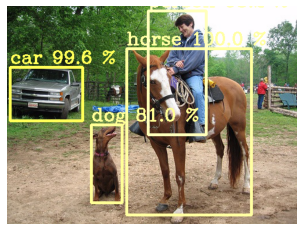

In [33]:
# convert colors BGR -> RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# disable axis display, then display image
plt.axis("off")
plt.imshow(image)

## Run a different image

Loaded input image [ https://static01.nyt.com/images/2021/12/22/nyregion/00nytraffic03/00nytraffic03-mediumSquareAt3X.jpg ], resolution= 1800.0 w x  1800.0 h
Resized input image from (1800, 1800) to (300, 300)


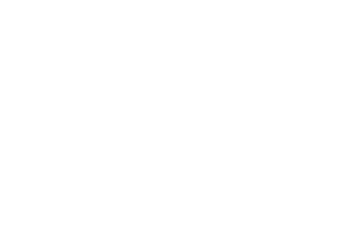

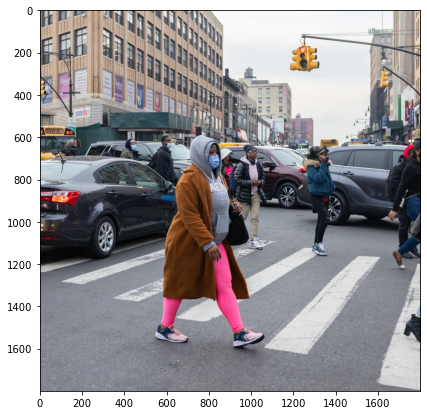

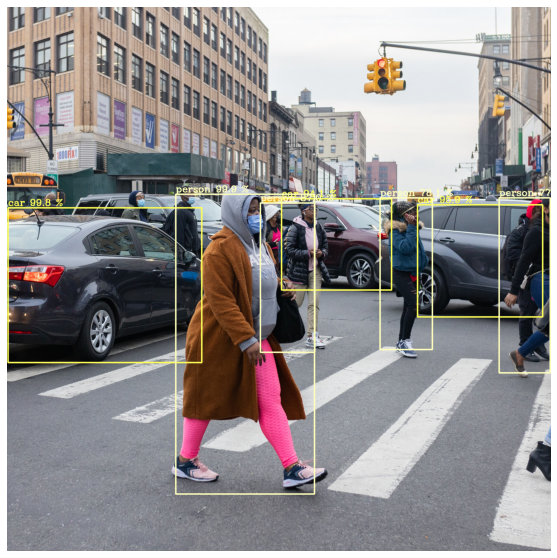

In [37]:
# define function to prepare input, run inference, and process inference results
def inferImage(image, verbose = True):
    # prepare input
    in_frame = resizeInputImage(image, verbose)

    # run inference
    res = exec_net.infer(inputs={input_blob: in_frame})   

    # process inference results 
    processResults(res)

# set path to different input image
input_path="https://static01.nyt.com/images/2021/12/22/nyregion/00nytraffic03/00nytraffic03-mediumSquareAt3X.jpg"

# load input image
image = loadInputImage(input_path)

# display input image
plt.axis("off")
plt.figure(figsize=(7,7))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# infer image
inferImage(image)

# display image with inference results
# convert colors BGR -> RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# create new figure, disable axis display, then display image
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(image)

Loaded input image [ https://www.jll.com.tw/images/people/people-photography/modern-office.jpg.rendition/cq5dam.web.1280.1280.jpeg ], resolution= 800.0 w x  600.0 h
Resized input image from (600, 800) to (300, 300)


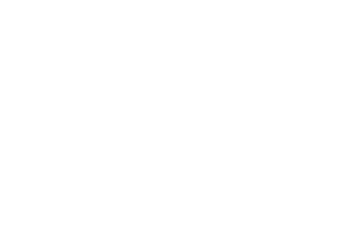

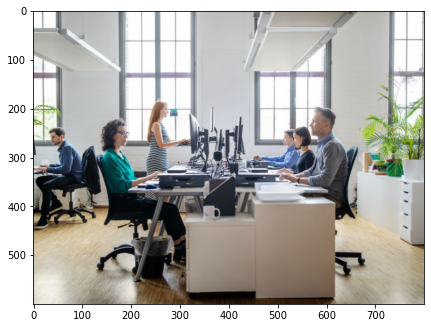

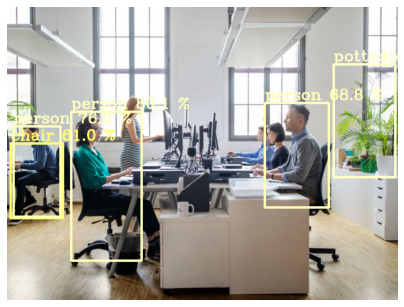

In [38]:
# input_path may be set to a local file or URL
input_path="https://www.jll.com.tw/images/people/people-photography/modern-office.jpg.rendition/cq5dam.web.1280.1280.jpeg"

# load input image
image = loadInputImage(input_path)

# display input image
plt.axis("off")
plt.figure(figsize=(7,7))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# infer image
inferImage(image)

# display image with inference results
# convert colors BGR -> RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# create figure, disable axis display, then display image
plt.figure(figsize=(7,7))
plt.axis("off")
plt.imshow(image)

##  Running inference on video


In [39]:
# input_path may be set to local file or URL 
input_path = "person-bicycle-car-detection.mp4"

print("Loading video [",input_path,"]")

# use OpenCV to load the input image
cap = cv2.VideoCapture(input_path) 
scale = 0.5
out_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) * scale)
out_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) * scale)
input_w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
input_h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
video_name = 'output.mp4'
frame = 20.0
vw = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'avc1'), frame, (out_width, out_height), True)

while cap.isOpened():
    # read video frame
    ret, image = cap.read()
   
    # break if no more video frames
    if not ret:
        break  
    
    inferImage(image, False)
    image = cv2.resize(image, (out_width, out_height))
    vw.write(image)

cap.release()
vw.release()
print("Done.")

Loading video [ person-bicycle-car-detection.mp4 ]
Done.


Let's take a look at the output video.

In [40]:
from IPython.display import Video
Video(video_name)